In [26]:
import numpy as np

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('datasets/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmod(x):
    return 1/(1+np.exp(-x))

#梯度上升法
def gradAscent(dataMat, classLabels):
    dataMatrix = np.mat(dataMat)
    labelMat = np.mat(classLabels).transpose()
    m, n = dataMatrix.shape
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmod(dataMatrix * weights)
        error = (labelMat - h)
        weights = weights + alpha*dataMatrix.transpose() * error
    return weights
        

In [94]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

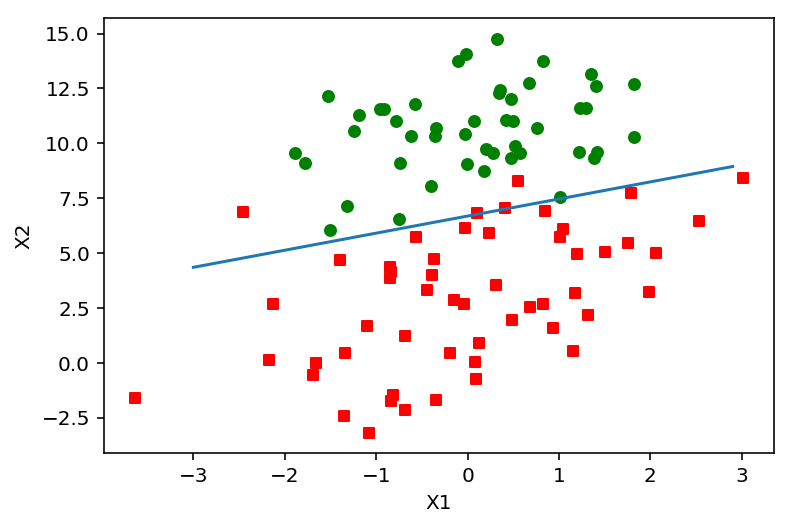

In [95]:
#画出决策边界
%matplotlib inline
import matplotlib.pyplot as plt
def plotWeights(x0, x1, x2):
    ax_0 = plt.figure(figsize=(4,2), dpi=144)
    plt.xlabel('x0')
    ax_0 = ax_0.add_subplot(111)
    ax_0.plot(range(0,200,2), x0, c='red')
    
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = dataArr.shape[0]
    xcord1 =[]
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        #二分类
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure(figsize=(6,4),dpi=144)
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red',marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')

#print(weights)
plotBestFit(weights.getA())

In [96]:
#随机梯度上升法
def randomGradAscent(dataMatrix, classLabels):
    x0 = []
    x1= []
    x2 = []
    m, n = dataMatrix.shape
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmod(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha*dataMatrix[i] * error
        x0.append(weights[0])
        x1.append(weights[1])
        x2.append(weights[2])
    return weights,x0, x1,x2

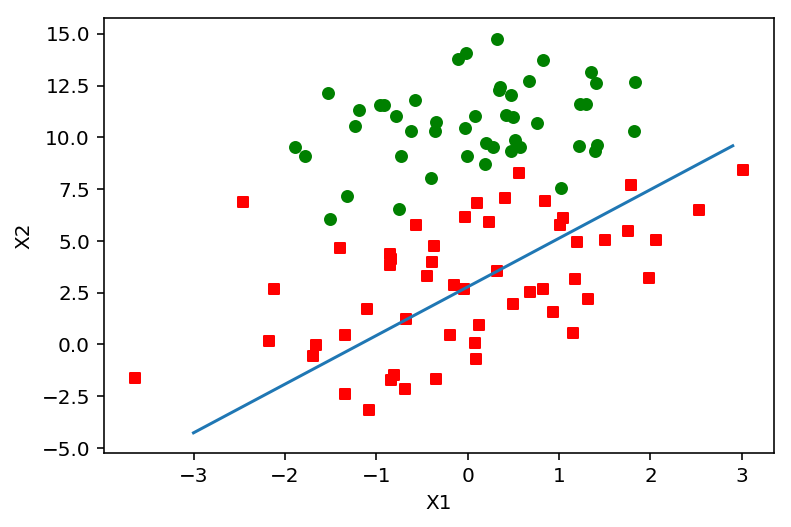

In [97]:
weights,x0, x1,x2 = randomGradAscent(np.array(dataArr), labelMat)
#plotWeights(x0, x1,x2)
plotBestFit(weights)

In [52]:
#改进随机梯度上升
def randomGradAscent_1(dataMatrix, classLabels, numIter=150):
    m, n = dataMatrix.shape
    #回归系数
    weights = np.ones(n)
    dataIndex = range(m)
    for j in range(numIter):
        for i in range(m):
            alpha = 4/(1.0+j +i) + 0.01
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmod(sum(dataMatrix[i] * weights))
            error = classLabels[i] - h
            weights = weights + alpha*dataMatrix[i] * error
            #从列表·删去值
            del(list(dataIndex)[randIndex])
    return weights

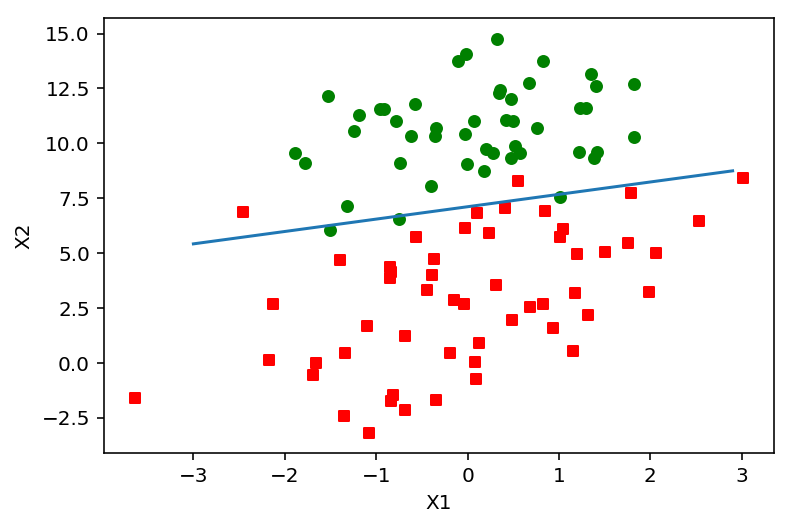

In [55]:
weights = randomGradAscent_1(np.array(dataArr), labelMat)
#print(labelMat)
plotBestFit(weights)

In [62]:
def classifyVector(inX, weights):
    prob = sigmod(sum(inX * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
    
#病症预测马的死亡率
def colicTest():
    frTrain = open('datasets/horseColicTraining.txt')
    frTest = open('datasets/horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = randomGradAscent_1(np.array(trainingSet), trainingLabels, 1000)
    
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [63]:
multiTest()

E:\Anaconda1\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
the error rate of this test is: 0.358209
after 10 iterations the average error rate is: 0.358209
